### Path Finder: What are the potential paths between two nodes?
### This pipeline can be used to get a ranked path between A and B given a set of paths.

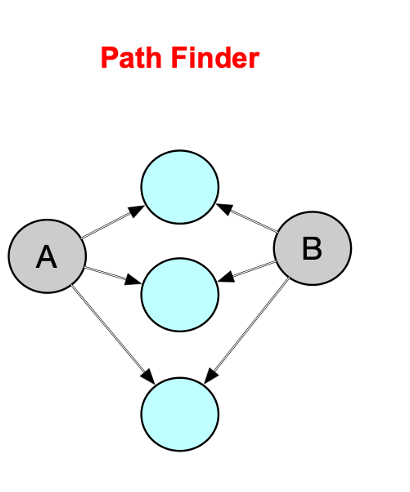

Example questions: 

What drugs may treat ovarian cancer (MONDO:0008170) patients with BRCA1 mutation?  

What is the mechanism of Olaparib being effective for patients with BRCA1 mutation?


In [10]:

from src.translator_component_toolkit import TCT, translator_kpinfo, name_resolver, translator_metakg

import yaml

In [11]:
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
    # Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
    # Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
    # Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))



53
(10580, 5)
(22129, 5)


MONDO:0008170
NCBIGene:672
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
'COHD TRAPI' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not itera

/Users/guangrong/Documents/GitHub_project/TCT/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


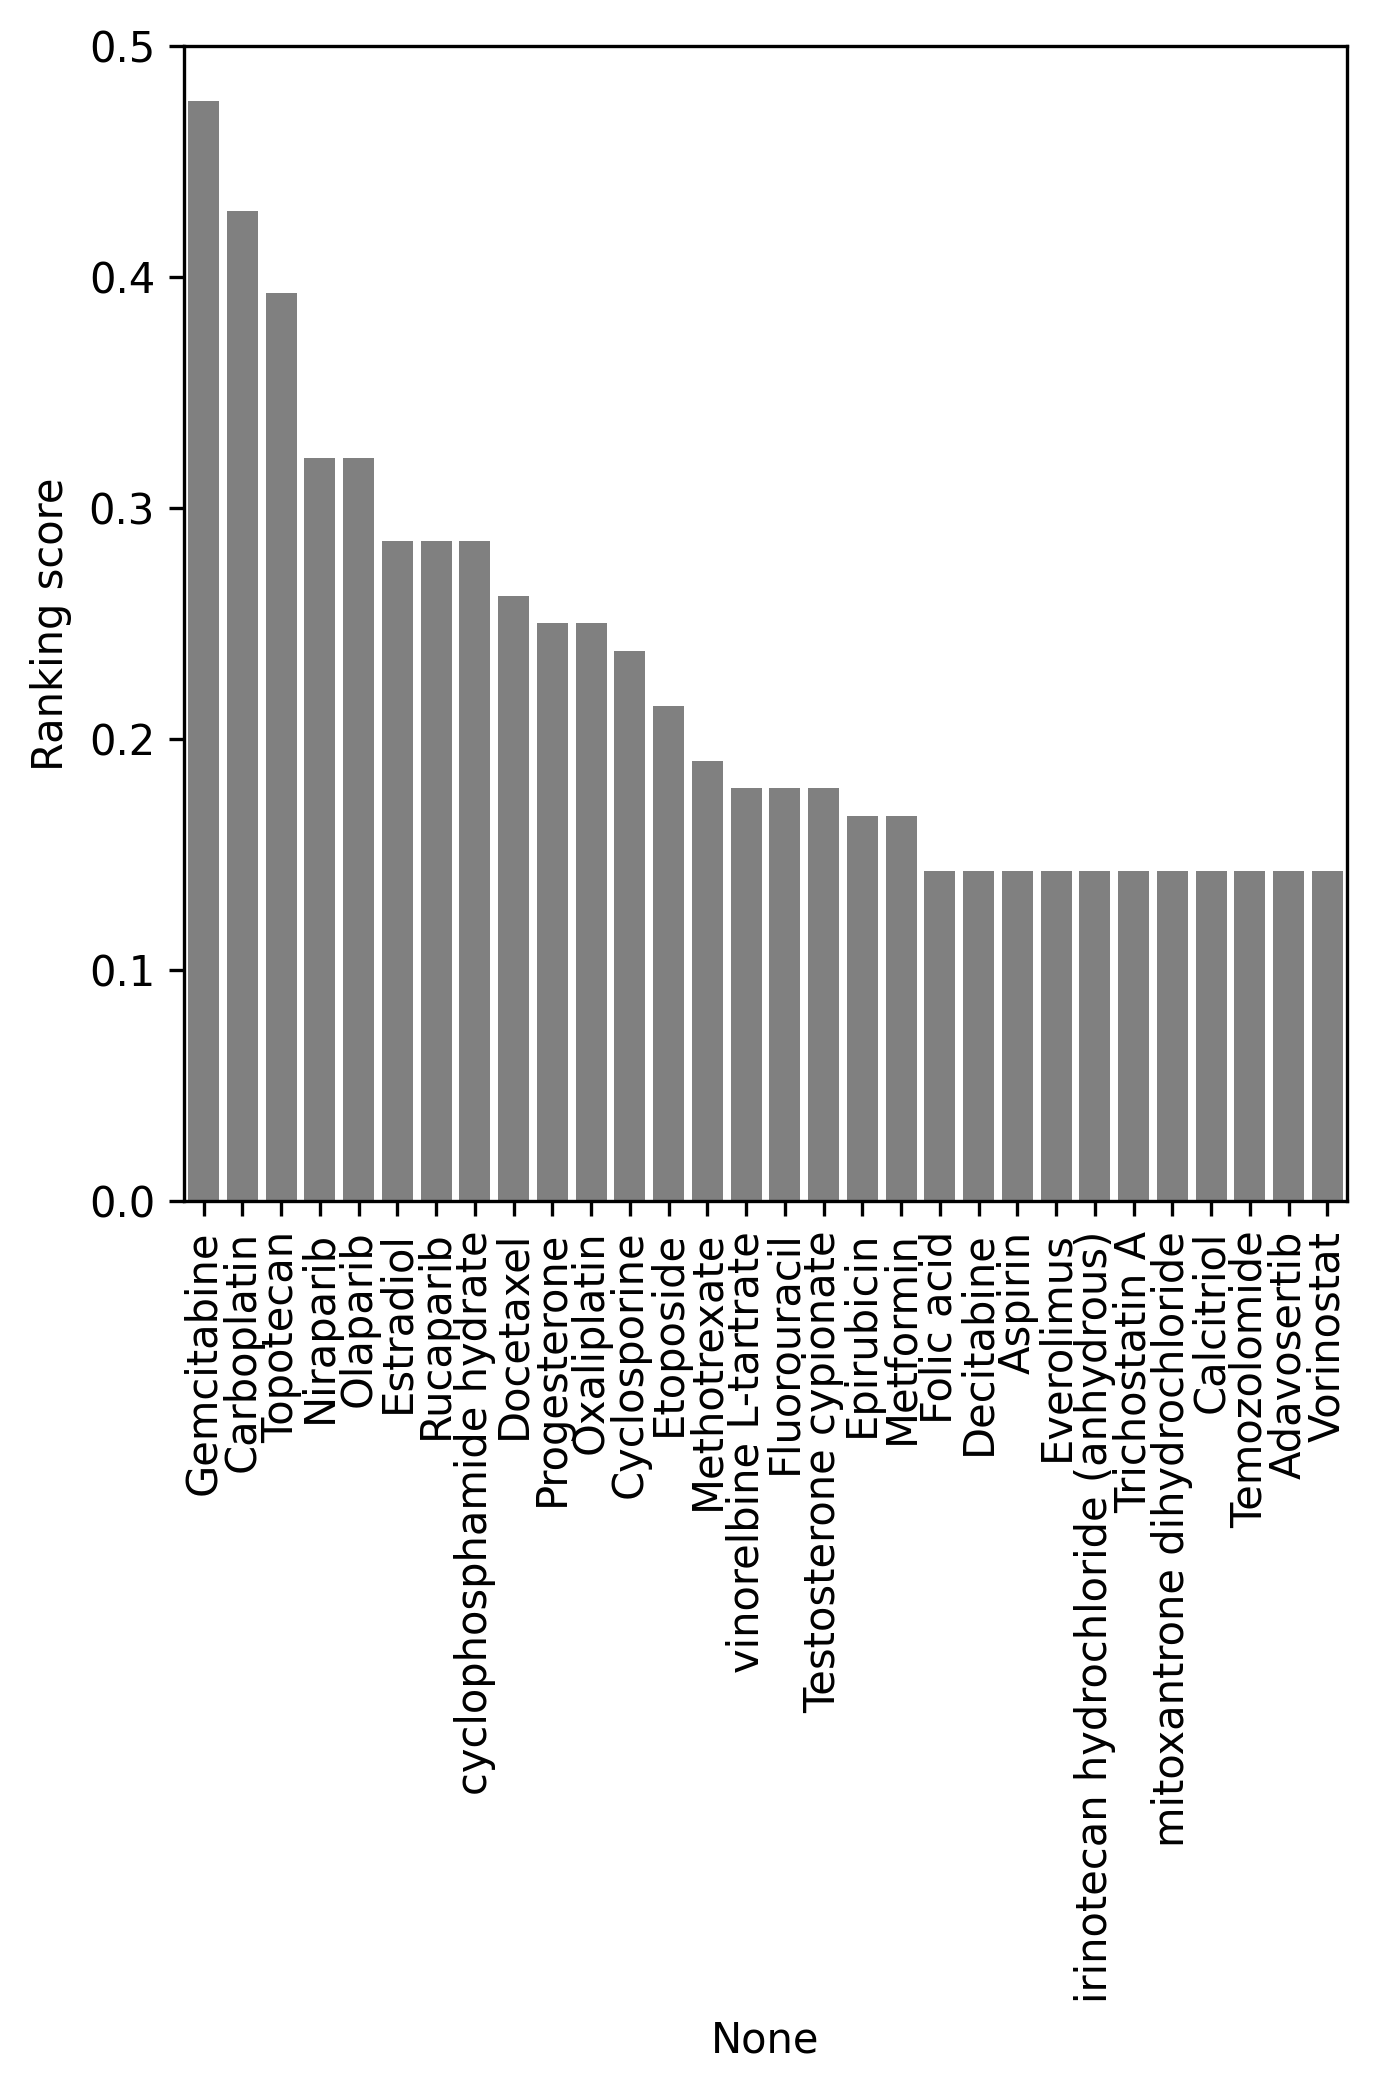

In [12]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('ovarian cancer', 
                                                                                                                                                                                'BRCA1',
                                                                                                                                                                                ['biolink:Drug', 'biolink:SmallMolecule', 'biolink:ChemicalEntity'],
                                                                                                                                                                                APInames=APInames,
                                                                                                                                                                                metaKG=metaKG,
                                                                                                                                                                                API_predicates=API_predicates)

In [13]:
paths

,score,output_node,predictes1,predictes2,output_node_name
Gemcitabine,0.476190,CHEBI:175901,biolink:treats; biolink:occurs_together_in_lit...,biolink:affects; biolink:affects; biolink:rela...,Gemcitabine
Carboplatin,0.428571,CHEBI:31355,biolink:treats; biolink:positively_correlated_...,biolink:affects; biolink:related_to; biolink:i...,Carboplatin
Topotecan,0.392857,CHEBI:63632,biolink:treats; biolink:positively_correlated_...,biolink:affects; biolink:regulates; biolink:re...,Topotecan
Niraparib,0.321429,CHEBI:176844,biolink:treats; biolink:in_clinical_trials_for...,biolink:affects; biolink:affects; biolink:inte...,Niraparib
Olaparib,0.321429,CHEBI:83766,biolink:treats; biolink:positively_correlated_...,biolink:affects; biolink:affects; biolink:rela...,Olaparib
...,...,...,...,...,...
Ribose,0.011905,CHEBI:33942,biolink:contributes_to,biolink:occurs_together_in_literature_with; bi...,Ribose
Radgocitabine,0.011905,CHEBI:145435,biolink:treats_or_applied_or_studied_to_treat,biolink:affects; biolink:affects; biolink:affects,Radgocitabine
platinum(0),0.011905,CHEBI:33400,biolink:occurs_together_in_literature_with,biolink:occurs_together_in_literature_with; bi...,platinum(0)
Trifluoperazine,0.011905,CHEBI:45951,biolink:treats_or_applied_or_studied_to_treat,biolink:affects; biolink:affects; biolink:affects,Trifluoperazine


In [15]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('Olaparib').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

In [18]:

#translator_component_toolkit.visulization_one_hop_ranking(result_ranked_by_primary_infores1, result_parsed1, num_of_nodes = 30, input_query = input_node1_id, fontsize = 5)

In [17]:
#translator_component_toolkit.visulization_one_hop_ranking(result_ranked_by_primary_infores2, result_parsed2, num_of_nodes = 30, input_query = input_node2_id,fontsize = 5,title_fontsize=12)